In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pickle
from torch.utils.data import TensorDataset, DataLoader
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
import dihedral_opt_program
from src.nn_training import Group, plot_schatten_norm_sums_and_loss, net_schatten_norm
from src.nn_training import g_net, conv_net, fc_net, relu_g_net, relu_conv_net, relu_fc_net
torch.__version__

'1.10.2'

In [2]:
def get_training_dataframes(experiment_name, force_train):
    if not force_train:
        try:
            with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
                dfs = pickle.load(f)
        except:
            print('Will train before plotting.')
            dfs = {}  # if training has not been done yet
    else:
            print('Will train before plotting.')
            dfs = {}
    return dfs

def postprocess_fn(x):
    return x

send to Andy

In [10]:
np.save('d8_sparse_w_noise_2.npy', dfs)

In [6]:
np.save('cnn_bois_fig1.npy', dfs[0]['CNN'][0].to_numpy())

In [7]:
np.save('gcnn_bois_fig1.npy', dfs[0]['G-CNN'][0].to_numpy())

In [5]:
np.save('fc_bois_fig1.npy', dfs[0]['FC'][0].to_numpy())

Will train before plotting.


  0%|          | 0/1 [00:00<?, ?it/s]

network output: tensor([[-9.5437],
        [10.9701]], grad_fn=<MmBackward0>)
<class 'src.nn_training_clean.conv_net'> did not converge 0 times to get 1 successes.


  0%|          | 0/1 [00:00<?, ?it/s]

network output: tensor([[-9.6393],
        [ 9.4492]], grad_fn=<MmBackward0>)
<class 'src.nn_training_clean.g_net'> did not converge 0 times to get 1 successes.


  0%|          | 0/1 [00:00<?, ?it/s]

network output: tensor([[-8.9624],
        [ 9.0374]], grad_fn=<MmBackward0>)
<class 'src.nn_training_clean.fc_net'> did not converge 0 times to get 1 successes.


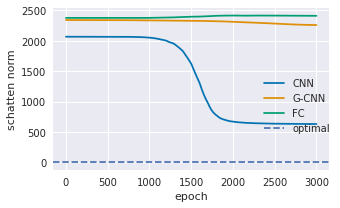

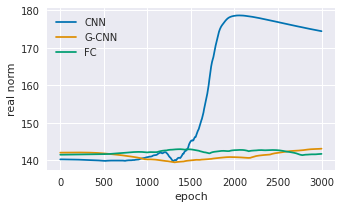

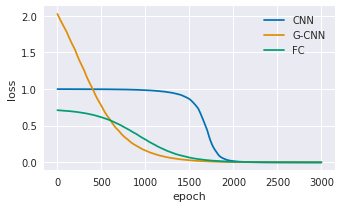

CPU times: user 26min 9s, sys: 40min 50s, total: 1h 7min
Wall time: 7min 58s


In [16]:
%%time
experiment_name = "c10c10c2_gaussian_50"
group = Group('C10C10C2')
k = 2
ins = torch.complex(torch.randn([2 * k, 200]), torch.zeros([2 * k, 200])) * 5
outs = torch.Tensor([[-1], [1]] * k)
N = 1 # average over trajectories
force_train = True

dataset = TensorDataset(ins.real, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))


nets = {"CNN": conv_net, "G-CNN": g_net, "FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader=dataloader, N=N,
                                       epochs=1000, lr=1e-6,
                                       postprocess_fn=postprocess_fn,
                                       cuda=False, dfs=dfs, exp_name=experiment_name)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

# Non-Abelian groups: dihedral groups and Small

## Compare linear G-CNN, linear CNN, and linear FC

### Plot in Fourier space and real space

#### D8 G-CNN and 2 columns of the D8 DFT matrix

input: tensor([[ 1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j,  1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j],
        [ 1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j, -1.-0.j, -1.-0.j,  1.-0.j,  1.-0.j]])
tensor(5.6569)
Will train before plotting.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-24.7657],
        [ 24.7049]], grad_fn=<MmBackward0>)
<class 'src.nn_training.conv_net'> did not converge 0 times to get 1 successes.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-19.8681],
        [ 18.3782]], grad_fn=<MmBackward0>)
<class 'src.nn_training.g_net'> did not converge 0 times to get 1 successes.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-24.2737],
        [ 24.2865]], grad_fn=<MmBackward0>)
<class 'src.nn_training.fc_net'> did not converge 0 times to get 1 successes.


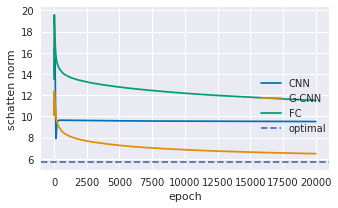

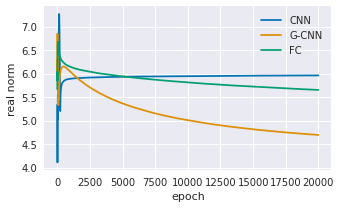

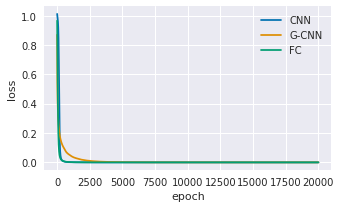

CPU times: user 2min 30s, sys: 4min 27s, total: 6min 57s
Wall time: 1min 23s


In [9]:
%%time
experiment_name = "d8_sparse_w_noise_2"
group = Group('D8')
N = 1 # average over trajectories
force_train = True

ins = torch.stack([group.f_mat[:, 2], group.f_mat[:, 3]])
outs = torch.Tensor([[-1], [1]])

print(f"input: {ins}")

X = np.diag((-1,1) ) @ins.numpy()
dopt = dihedral_opt_program.opt(8, X)
optimal_linearization = torch.Tensor(dopt).cfloat().reshape(-1, 1)
optimal_sparsity_norm = net_schatten_norm(optimal_linearization, group)[0]
print(optimal_sparsity_norm)

dataset = TensorDataset(ins.real, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))


nets = {"CNN": conv_net, "G-CNN": g_net, "FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=dataloader,
                                            postprocess_fn=postprocess_fn, N=N,
                                            epochs=20_000, cuda=False, lr=0.01, dfs=dfs,
                                            exp_name=experiment_name,
                                            horizontal_lb=optimal_sparsity_norm)

with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

#### D8 G-CNN and 2 Gaussian datapoints 

In [3]:
torch.manual_seed(2)
ins = torch.complex(torch.randn([2, 8]), torch.zeros([2, 8]))
outs = torch.Tensor([[-1], [1]])

Optimal linearization is  tensor([[-0.0394+0.j],
        [ 0.0394+0.j],
        [-0.4984+0.j],
        [ 0.4984+0.j],
        [ 0.4856+0.j],
        [-0.4856+0.j],
        [ 0.1190+0.j],
        [-0.1190+0.j]])
tensor(5.6573)
Will train before plotting.


<timed exec>:10: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/Copy.cpp:244.)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-21.9897],
        [ 21.5798]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.1199],
        [ 21.8235]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-21.7190],
        [ 21.6642]], grad_fn=<MmBackward0>)
<class 'src.nn_training.conv_net'> did not converge 0 times to get 3 successes.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.9387],
        [ 21.8038]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.5901],
        [ 21.9466]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.3969],
        [ 21.9217]], grad_fn=<MmBackward0>)
<class 'src.nn_training.g_net'> did not converge 0 times to get 3 successes.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.1158],
        [ 21.0328]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.0927],
        [ 21.0401]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.0971],
        [ 21.0368]], grad_fn=<MmBackward0>)
<class 'src.nn_training.fc_net'> did not converge 0 times to get 3 successes.


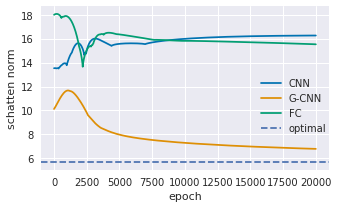

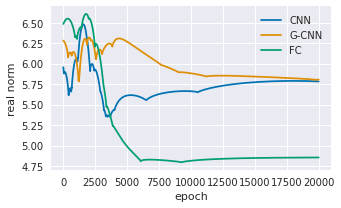

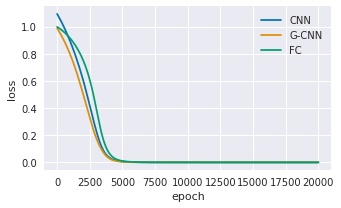

CPU times: user 10min 28s, sys: 23min 48s, total: 34min 16s
Wall time: 16min 29s


In [4]:
%%time
experiment_name = "d8_sparse_gaussian_2"

group = Group('D8')

dataset = TensorDataset(ins.real, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))
X = np.diag((-1,1)) @ ins.numpy()

dopt = dihedral_opt_program.opt(8, X)
optimal_linearization = torch.Tensor(dopt).cfloat().reshape(-1, 1)
print("Optimal linearization is ", optimal_linearization / torch.linalg.vector_norm(optimal_linearization))

optimal_sparsity_norm = net_schatten_norm(optimal_linearization, group)[0]

print(optimal_sparsity_norm)

N = 3 # average over trajectories
force_train = True

nets = {"CNN": conv_net, "G-CNN": g_net, "FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn, N,
                                       epochs=20_000, cuda=False,
                                       lr=5e-5,  # based
                                       dfs=dfs, exp_name=experiment_name,
                                       horizontal_lb=optimal_sparsity_norm)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

#### SmallGroup(200, 44) G-CNN and 10 Gaussian datapoints

In [ ]:
%%time
experiment_name = "ccq200_gaussian_10"
group = Group('CCQ200')
k = 5
ins_m = torch.complex(torch.randn([k, 200]) + 1e-2, torch.zeros([k, 200]))
ins_p = torch.complex(torch.randn([k, 200]) - 1e-2, torch.zeros([k, 200]))
ins = torch.cat([ins_m, ins_p])
outs_p = torch.Tensor([[-1]] * k)
outs_m = torch.Tensor([[1]] * k)
outs = torch.cat([outs_m, outs_p])
dataset = TensorDataset(ins, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))

N = 10  # average over trajectories
force_train = False

nets = {"CNN": conv_net, "G-CNN": g_net, "FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn,
                                       N, epochs=500, cuda=False, dfs=dfs, exp_name=experiment_name)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

# Non-Abelian groups with **non-linear** networks: try on a large dihedral group (D60)

## Compare ReLU G-CNN, ReLU CNN, and ReLU FC

#### D8 G-CNN and 2 columns of the D8 DFT matrix

input: tensor([[ 1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j,  1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j],
        [ 1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j, -1.-0.j, -1.-0.j,  1.-0.j,  1.-0.j]])
Will train before plotting.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-25.1998],
        [ 24.5139]], grad_fn=<MmBackward0>)
<class 'src.nn_training.relu_conv_net'> did not converge 0 times to get 1 successes.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-13.2607],
        [ 15.9649]], grad_fn=<MmBackward0>)
<class 'src.nn_training.relu_g_net'> did not converge 0 times to get 1 successes.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-24.3280],
        [  0.0000]], grad_fn=<MmBackward0>)
tensor([[-24.3226],
        [ 24.3224]], grad_fn=<MmBackward0>)
<class 'src.nn_training.relu_fc_net'> did not converge 1 times to get 1 successes.


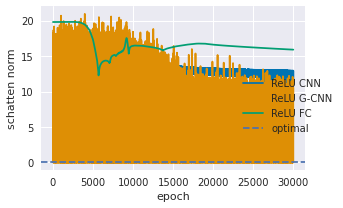

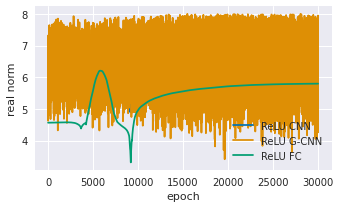

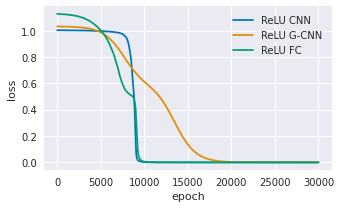

CPU times: user 8min 15s, sys: 12min 23s, total: 20min 39s
Wall time: 5min 11s


In [76]:
%%time
experiment_name = "relu_d8_sparse_w_noise_2"
group = Group('D8')
N = 1 # average over trajectories
force_train = True

ins = torch.stack([group.f_mat[:, 2], group.f_mat[:, 3]])
outs = torch.Tensor([[-1], [1]])

print(f"input: {ins}")

dataset = TensorDataset(ins.real, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))

nets = {"ReLU CNN": relu_conv_net, "ReLU G-CNN": relu_g_net, "ReLU FC": relu_fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=dataloader,
                                            postprocess_fn=postprocess_fn, N=N,
                                            epochs=30_000, cuda=False, lr=5e-6, dfs=dfs,
                                            exp_name=experiment_name)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [77]:
dfs['ReLU G-CNN'] = (dfs['ReLU G-CNN'][0][dfs['ReLU G-CNN'][0]['schatten'] != 0].rolling(100).mean(),
                     dfs['ReLU G-CNN'][1],
                     dfs['ReLU G-CNN'][2])

In [78]:
dfs['ReLU CNN'] = (dfs['ReLU CNN'][0].rolling(100).mean(),
                   dfs['ReLU CNN'][1],
                   dfs['ReLU CNN'][2])

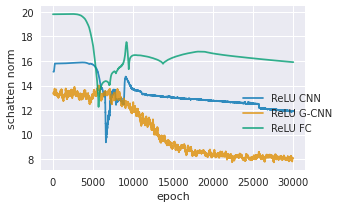

In [79]:
net_name = 'ReLU G-CNN'
scaling = 1.8
color_palette = sns.color_palette('colorblind', 3)

plt.figure(figsize=(scaling * 2.695, scaling * 1.666))
for i, net_name in enumerate(dfs.keys()):
    df_sch, df_losses, _ = dfs[net_name]
    lp = sns.lineplot(data=df_sch, x="epoch", y="schatten",
                      label=net_name, color=color_palette[i], alpha=0.8)
plt.xlabel('epoch')
# plt.ylabel(r'$\displaystyle\|\widehat{\boldsymbol{\beta}}\|^{(S)}_{2/L}$')
plt.ylabel('schatten norm')
plt.legend(loc=(0.75, 0.20))
fig = plt.gcf()
# fig.savefig(f'figures/{exp_name}_fourier_space.pdf', format='pdf', bbox_inches='tight')
plt.show()


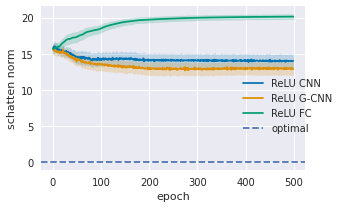

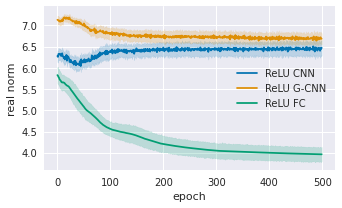

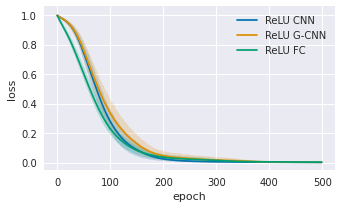

CPU times: user 1min 4s, sys: 174 ms, total: 1min 4s
Wall time: 1min 5s


In [80]:
%%time
experiment_name = "relu_d8_gaussians_2"
group = Group('D8')
ins = torch.complex(torch.randn([2, 8]), torch.zeros([2, 8]))
outs = torch.Tensor([[-1], [1]])
dataset = TensorDataset(ins, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))
N = 50 # average over trajectories
force_train = False

nets = {"ReLU CNN": relu_conv_net, "ReLU G-CNN": relu_g_net, "ReLU FC": relu_fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn,
                                       N, epochs=500, cuda=False, lr=0.1, dfs=dfs, exp_name=experiment_name)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

#### D60 G-CNN and 10 Gaussian datapoints

Will train before plotting.


  0%|          | 0/5 [00:00<?, ?it/s]

preds: tensor([[ 24.4798],
        [ 20.5249],
        [ 15.2690],
        [ 16.4207],
        [ 19.4085],
        [ 17.0856],
        [ 16.5231],
        [ 14.8506],
        [ 15.0859],
        [ 17.0649],
        [-15.5295],
        [-15.4450],
        [-23.6032],
        [-15.1613],
        [-16.3934],
        [-15.0361],
        [-20.4967],
        [-22.5962],
        [-17.3764],
        [-16.2563]], grad_fn=<MmBackward0>)
preds: tensor([[ 35.9563],
        [ 32.1048],
        [ 17.1233],
        [ 23.0627],
        [ 16.8811],
        [ 16.2717],
        [ 17.7102],
        [ 15.0627],
        [ 15.3846],
        [ 14.8156],
        [-19.3885],
        [-16.5062],
        [-17.8993],
        [-15.0370],
        [-15.4351],
        [-37.0417],
        [-15.0293],
        [-15.8565],
        [-16.5726],
        [-15.7161]], grad_fn=<MmBackward0>)
preds: tensor([[ 21.5156],
        [ 23.0972],
        [ 15.8721],
        [ 15.9047],
        [ 26.6305],
        [ 17.7425],
        [ 1

  0%|          | 0/5 [00:00<?, ?it/s]

preds: tensor([[  5.7076],
        [  0.0000],
        [  7.2166],
        [  4.5398],
        [  6.9564],
        [  6.6753],
        [  6.1509],
        [  5.3490],
        [  5.8806],
        [  5.2811],
        [ -6.2921],
        [ -5.3295],
        [ -6.0303],
        [ -4.2146],
        [ -5.7473],
        [ -6.4498],
        [-14.9633],
        [-12.7027],
        [ -7.2985],
        [ -7.0185]], grad_fn=<MmBackward0>)
preds: tensor([[  9.3460],
        [  9.6103],
        [  8.5325],
        [  9.9402],
        [ 10.1729],
        [  9.8840],
        [  8.9059],
        [  7.9525],
        [  8.5849],
        [  8.5552],
        [ -8.5293],
        [ -9.0477],
        [-25.4958],
        [ -9.6897],
        [-16.1951],
        [ -8.7477],
        [-10.3312],
        [ -9.1105],
        [ -8.2155],
        [ -8.4416]], grad_fn=<MmBackward0>)
preds: tensor([[  9.0060],
        [  9.8308],
        [  8.4805],
        [ 18.3487],
        [ 15.8088],
        [  9.8421],
        [  

  0%|          | 0/5 [00:00<?, ?it/s]

preds: tensor([[ 15.4090],
        [ 16.0929],
        [ 14.8335],
        [ 16.2107],
        [ 15.9026],
        [ 15.0203],
        [ 15.1828],
        [ 14.9531],
        [ 15.0423],
        [ 15.0481],
        [-14.7081],
        [-15.0127],
        [-16.4860],
        [-16.8518],
        [-14.9536],
        [-15.1976],
        [-15.8208],
        [-16.0169],
        [-14.9411],
        [-15.0553]], grad_fn=<MmBackward0>)
preds: tensor([[ 15.9818],
        [ 16.5469],
        [ 14.9584],
        [ 18.1855],
        [ 15.9032],
        [ 14.6603],
        [ 15.6852],
        [ 14.8136],
        [ 14.8318],
        [ 14.9642],
        [-15.2624],
        [-14.9464],
        [-16.8945],
        [-16.6645],
        [-14.9162],
        [-14.8000],
        [-15.6202],
        [-16.1583],
        [-14.7398],
        [-14.9555]], grad_fn=<MmBackward0>)
preds: tensor([[ 15.9344],
        [ 16.8909],
        [ 14.8842],
        [ 16.8981],
        [ 15.2961],
        [ 14.9954],
        [ 1

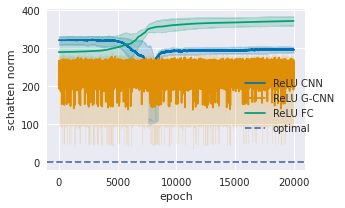

In [ ]:
%%time
experiment_name = "relu_d60_gaussian_10_sep"
group = Group('D60')
k = 10
ins_m = torch.randn([k, 60])
ins_p = torch.randn([k, 60])
ins = torch.cat([ins_m, ins_p])
outs_p = torch.Tensor([[-1]] * k)
outs_m = torch.Tensor([[1]] * k)
outs = torch.cat([outs_m, outs_p])
dataset = TensorDataset(ins, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))
N = 5 # average over trajectories
force_train = True

nets = {"ReLU CNN": relu_conv_net, "ReLU G-CNN": relu_g_net, "ReLU FC": relu_fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn,
                                       N, epochs=20000, cuda=False, dfs=dfs,
                                       exp_name=experiment_name,
                                       lr=5e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
%%time
experiment_name = "relu_ccq200_gaussian_190"
group = Group('CCQ200')
k = 99
ins_m = torch.complex(torch.randn([k, 200]) + 1., torch.zeros([k, 200]))
ins_p = torch.complex(torch.randn([k, 200]) - 1., torch.zeros([k, 200]))
ins = torch.cat([ins_m, ins_p])
outs_p = torch.Tensor([[-1]] * k)
outs_m = torch.Tensor([[1]] * k)
outs = torch.cat([outs_m, outs_p])
dataset = TensorDataset(ins, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))
N = 10  # average over trajectories
force_train = False

nets = {"ReLU CNN": relu_conv_net, "ReLU G-CNN": relu_g_net, "ReLU FC": relu_fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn,
                                       N, epochs=500, cuda=False, dfs=dfs, lr=0.01, exp_name=experiment_name)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [ ]:
set_size(397.48499, fraction=0.49)